In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from model import BN_model,Model_summary,LN_model,GN_model
from utils import train,test,train_losses,test_losses,test_acc,train_acc

In [2]:
train_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2)
    ])

test_transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


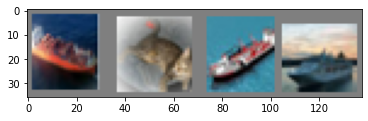

ship  cat   ship  ship 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:6" if use_cuda else "cpu")
print(device)

cuda:6


import torchsummary as summary

In [5]:
model = BN_model().to(device)


In [6]:
Model_summary(model, size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
              ReLU-2           [-1, 16, 30, 30]               0
       BatchNorm2d-3           [-1, 16, 30, 30]              32
         Dropout2d-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 32, 28, 28]           4,640
              ReLU-6           [-1, 32, 28, 28]               0
       BatchNorm2d-7           [-1, 32, 28, 28]              64
         Dropout2d-8           [-1, 32, 28, 28]               0
            Conv2d-9           [-1, 16, 28, 28]             528
        MaxPool2d-10           [-1, 16, 14, 14]               0
           Conv2d-11           [-1, 16, 14, 14]           2,320
             ReLU-12           [-1, 16, 14, 14]               0
      BatchNorm2d-13           [-1, 16, 14, 14]              32
        Dropout2d-14           [-1, 16,

Model_1 with BN without x+conv(x)

In [7]:
from torch.optim.lr_scheduler import StepLR

#model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch)
    # scheduler.step()
    test(model, device, testloader)

EPOCH: 0


Loss=2.318704128265381 Batch_id=12499 Accuracy=34.27: 100%|██████████| 12500/12500 [01:25<00:00, 145.63it/s]  



Test set: Average loss: 1.5356, Accuracy: 4366/10000 (43.66%)

EPOCH: 1


Loss=2.6709365844726562 Batch_id=12499 Accuracy=44.47: 100%|██████████| 12500/12500 [01:26<00:00, 144.85it/s] 



Test set: Average loss: 1.3386, Accuracy: 5230/10000 (52.30%)

EPOCH: 2


Loss=1.5194860696792603 Batch_id=12499 Accuracy=50.82: 100%|██████████| 12500/12500 [01:24<00:00, 147.19it/s] 



Test set: Average loss: 1.2098, Accuracy: 5660/10000 (56.60%)

EPOCH: 3


Loss=0.5819471478462219 Batch_id=12499 Accuracy=55.21: 100%|██████████| 12500/12500 [01:25<00:00, 145.53it/s]  



Test set: Average loss: 1.1994, Accuracy: 5696/10000 (56.96%)

EPOCH: 4


Loss=0.9412877559661865 Batch_id=12499 Accuracy=58.56: 100%|██████████| 12500/12500 [01:25<00:00, 145.96it/s]  



Test set: Average loss: 1.1173, Accuracy: 6081/10000 (60.81%)

EPOCH: 5


Loss=0.815597414970398 Batch_id=12499 Accuracy=60.52: 100%|██████████| 12500/12500 [01:26<00:00, 144.25it/s]   



Test set: Average loss: 1.0720, Accuracy: 6235/10000 (62.35%)

EPOCH: 6


Loss=1.9680246114730835 Batch_id=12499 Accuracy=62.18: 100%|██████████| 12500/12500 [01:26<00:00, 145.11it/s]  



Test set: Average loss: 0.9423, Accuracy: 6705/10000 (67.05%)

EPOCH: 7


Loss=0.29373157024383545 Batch_id=12499 Accuracy=63.67: 100%|██████████| 12500/12500 [01:26<00:00, 144.08it/s] 



Test set: Average loss: 0.9744, Accuracy: 6602/10000 (66.02%)

EPOCH: 8


Loss=0.30285269021987915 Batch_id=12499 Accuracy=64.77: 100%|██████████| 12500/12500 [01:53<00:00, 109.69it/s] 



Test set: Average loss: 0.9568, Accuracy: 6627/10000 (66.27%)

EPOCH: 9


Loss=0.7328287363052368 Batch_id=12499 Accuracy=65.68: 100%|██████████| 12500/12500 [01:43<00:00, 120.54it/s]  



Test set: Average loss: 0.8824, Accuracy: 6941/10000 (69.41%)

EPOCH: 10


Loss=1.3564832210540771 Batch_id=12499 Accuracy=66.43: 100%|██████████| 12500/12500 [01:25<00:00, 145.41it/s]  



Test set: Average loss: 0.8833, Accuracy: 6949/10000 (69.49%)

EPOCH: 11


Loss=0.5789933800697327 Batch_id=12499 Accuracy=66.98: 100%|██████████| 12500/12500 [01:27<00:00, 143.40it/s]  



Test set: Average loss: 0.8643, Accuracy: 6995/10000 (69.95%)

EPOCH: 12


Loss=0.8455086350440979 Batch_id=12499 Accuracy=67.97: 100%|██████████| 12500/12500 [01:27<00:00, 143.08it/s]  



Test set: Average loss: 0.9002, Accuracy: 6786/10000 (67.86%)

EPOCH: 13


Loss=1.6773483753204346 Batch_id=12499 Accuracy=68.14: 100%|██████████| 12500/12500 [01:27<00:00, 142.93it/s]  



Test set: Average loss: 0.8232, Accuracy: 7184/10000 (71.84%)

EPOCH: 14


Loss=0.2955891489982605 Batch_id=12499 Accuracy=68.60: 100%|██████████| 12500/12500 [01:26<00:00, 144.12it/s]  



Test set: Average loss: 0.9099, Accuracy: 6834/10000 (68.34%)

EPOCH: 15


Loss=0.49721646308898926 Batch_id=12499 Accuracy=69.36: 100%|██████████| 12500/12500 [01:26<00:00, 144.24it/s] 



Test set: Average loss: 0.9482, Accuracy: 6743/10000 (67.43%)

EPOCH: 16


Loss=0.5261195302009583 Batch_id=12499 Accuracy=69.49: 100%|██████████| 12500/12500 [01:27<00:00, 142.19it/s]  



Test set: Average loss: 0.8231, Accuracy: 7182/10000 (71.82%)

EPOCH: 17


Loss=0.7987369298934937 Batch_id=12499 Accuracy=70.04: 100%|██████████| 12500/12500 [01:27<00:00, 142.17it/s]   



Test set: Average loss: 0.8164, Accuracy: 7185/10000 (71.85%)

EPOCH: 18


Loss=0.9572460055351257 Batch_id=12499 Accuracy=70.53: 100%|██████████| 12500/12500 [01:40<00:00, 124.27it/s]  



Test set: Average loss: 0.8509, Accuracy: 7014/10000 (70.14%)

EPOCH: 19


Loss=0.29578277468681335 Batch_id=12499 Accuracy=70.75: 100%|██████████| 12500/12500 [02:04<00:00, 100.15it/s] 



Test set: Average loss: 0.7992, Accuracy: 7200/10000 (72.00%)



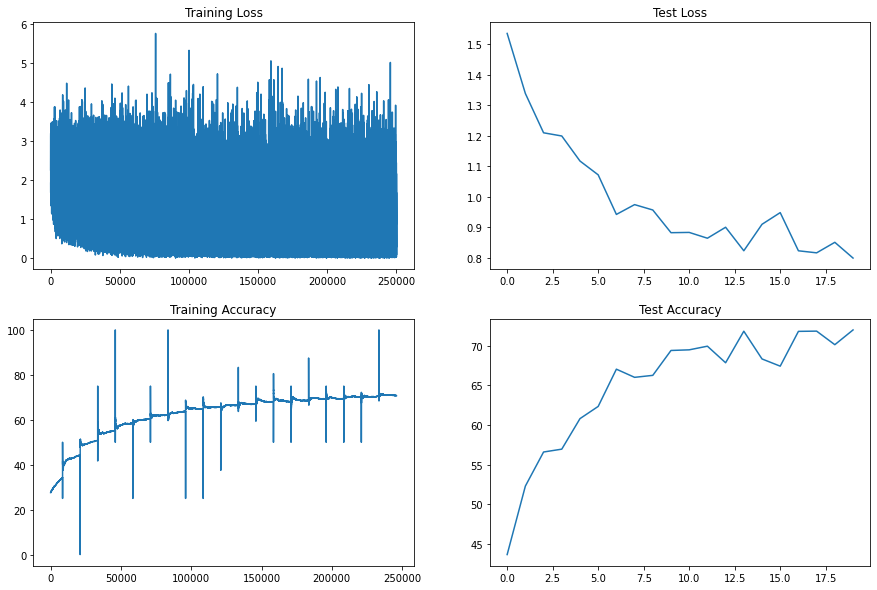

In [15]:
import matplotlib.pyplot as plt

# Convert lists to PyTorch tensors
train_losses = torch.tensor(train_losses)
train_acc = torch.tensor(train_acc)
test_losses = torch.tensor(test_losses)
test_acc = torch.tensor(test_acc)

# Move tensors to CPU memory
train_losses_cpu = train_losses.cpu()
train_acc_cpu = train_acc.cpu()
test_losses_cpu = test_losses.cpu()
test_acc_cpu = test_acc.cpu()

# Plot the figures
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses_cpu)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_cpu[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_cpu)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_cpu)
axs[1, 1].set_title("Test Accuracy")

# Display the plots
plt.show()


Layer Normalization

In [7]:
device

device(type='cuda', index=6)

In [8]:
model=LN_model().to(device)
#Model_summary(model,size=(3,32,32))

In [9]:
#from torch.optim.lr_scheduler import StepLR

#model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch)
    # scheduler.step()
    test(model, device, testloader)

EPOCH: 0


  0%|          | 0/12500 [00:00<?, ?it/s]

Loss=1.515247106552124 Batch_id=12499 Accuracy=29.03: 100%|██████████| 12500/12500 [05:34<00:00, 37.41it/s]  



Test set: Average loss: 1.6723, Accuracy: 3953/10000 (39.53%)

EPOCH: 1


Loss=1.2820476293563843 Batch_id=12499 Accuracy=37.33: 100%|██████████| 12500/12500 [04:30<00:00, 46.20it/s] 



Test set: Average loss: 1.5617, Accuracy: 4261/10000 (42.61%)

EPOCH: 2


Loss=1.0924965143203735 Batch_id=12499 Accuracy=41.29: 100%|██████████| 12500/12500 [03:33<00:00, 58.66it/s] 



Test set: Average loss: 1.4329, Accuracy: 4818/10000 (48.18%)

EPOCH: 3


Loss=1.1492094993591309 Batch_id=12499 Accuracy=44.96: 100%|██████████| 12500/12500 [04:40<00:00, 44.52it/s] 



Test set: Average loss: 1.3296, Accuracy: 5156/10000 (51.56%)

EPOCH: 4


Loss=1.0853772163391113 Batch_id=12499 Accuracy=49.19: 100%|██████████| 12500/12500 [05:39<00:00, 36.87it/s] 



Test set: Average loss: 1.3847, Accuracy: 4664/10000 (46.64%)

EPOCH: 5


Loss=1.6387687921524048 Batch_id=12499 Accuracy=52.79: 100%|██████████| 12500/12500 [04:30<00:00, 46.14it/s] 



Test set: Average loss: 1.1280, Accuracy: 5918/10000 (59.18%)

EPOCH: 6


Loss=0.6795414090156555 Batch_id=12499 Accuracy=55.60: 100%|██████████| 12500/12500 [04:34<00:00, 45.53it/s] 



Test set: Average loss: 1.1148, Accuracy: 6010/10000 (60.10%)

EPOCH: 7


Loss=0.5961158275604248 Batch_id=12499 Accuracy=57.72: 100%|██████████| 12500/12500 [06:15<00:00, 33.27it/s] 



Test set: Average loss: 1.0539, Accuracy: 6273/10000 (62.73%)

EPOCH: 8


Loss=0.7691837549209595 Batch_id=12499 Accuracy=59.38: 100%|██████████| 12500/12500 [06:28<00:00, 32.19it/s] 



Test set: Average loss: 1.0358, Accuracy: 6327/10000 (63.27%)

EPOCH: 9


Loss=0.6751164197921753 Batch_id=12499 Accuracy=61.15: 100%|██████████| 12500/12500 [05:20<00:00, 38.98it/s]  



Test set: Average loss: 0.9598, Accuracy: 6624/10000 (66.24%)

EPOCH: 10


Loss=0.5876362323760986 Batch_id=12499 Accuracy=62.45: 100%|██████████| 12500/12500 [05:02<00:00, 41.30it/s]  



Test set: Average loss: 0.9383, Accuracy: 6653/10000 (66.53%)

EPOCH: 11


Loss=0.658176064491272 Batch_id=12499 Accuracy=63.73: 100%|██████████| 12500/12500 [05:01<00:00, 41.43it/s]   



Test set: Average loss: 0.9341, Accuracy: 6745/10000 (67.45%)

EPOCH: 12


Loss=0.8429418802261353 Batch_id=12499 Accuracy=64.72: 100%|██████████| 12500/12500 [04:27<00:00, 46.69it/s]  



Test set: Average loss: 0.9088, Accuracy: 6778/10000 (67.78%)

EPOCH: 13


Loss=0.09234832972288132 Batch_id=12499 Accuracy=65.53: 100%|██████████| 12500/12500 [05:20<00:00, 38.95it/s] 



Test set: Average loss: 0.8838, Accuracy: 6917/10000 (69.17%)

EPOCH: 14


Loss=0.6984301209449768 Batch_id=12499 Accuracy=66.26: 100%|██████████| 12500/12500 [04:37<00:00, 45.11it/s]  



Test set: Average loss: 0.8287, Accuracy: 7053/10000 (70.53%)

EPOCH: 15


Loss=0.919812023639679 Batch_id=12499 Accuracy=67.11: 100%|██████████| 12500/12500 [03:37<00:00, 57.41it/s]   



Test set: Average loss: 0.8374, Accuracy: 7019/10000 (70.19%)

EPOCH: 16


Loss=1.7824182510375977 Batch_id=12499 Accuracy=67.78: 100%|██████████| 12500/12500 [04:22<00:00, 47.61it/s]  



Test set: Average loss: 0.8321, Accuracy: 7113/10000 (71.13%)

EPOCH: 17


Loss=0.3498433828353882 Batch_id=12499 Accuracy=68.61: 100%|██████████| 12500/12500 [05:36<00:00, 37.15it/s]  



Test set: Average loss: 0.8363, Accuracy: 7042/10000 (70.42%)

EPOCH: 18


Loss=1.3659703731536865 Batch_id=12499 Accuracy=69.22: 100%|██████████| 12500/12500 [04:43<00:00, 44.13it/s]  



Test set: Average loss: 0.8046, Accuracy: 7178/10000 (71.78%)

EPOCH: 19


Loss=0.3505615293979645 Batch_id=12499 Accuracy=69.51: 100%|██████████| 12500/12500 [04:34<00:00, 45.52it/s]  



Test set: Average loss: 0.8220, Accuracy: 7133/10000 (71.33%)



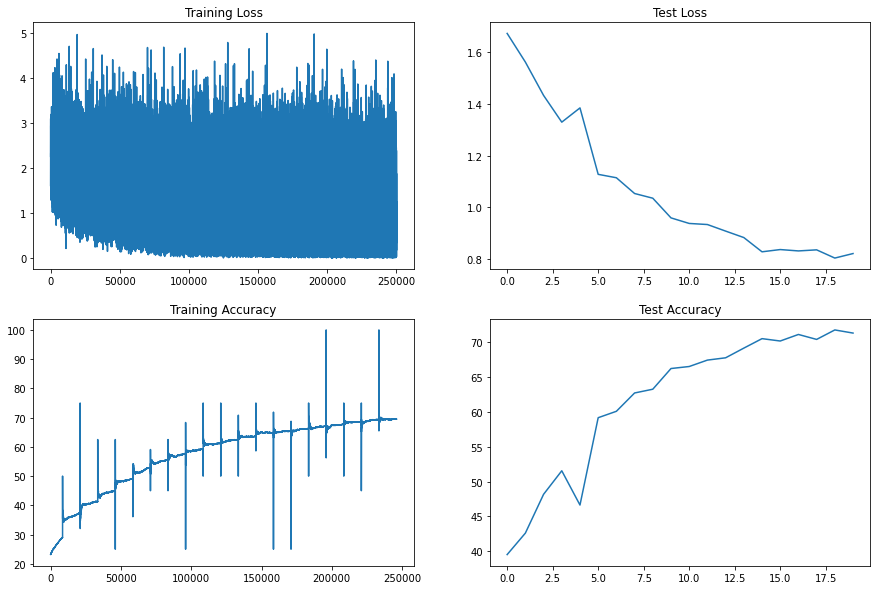

In [10]:
import matplotlib.pyplot as plt

# Convert lists to PyTorch tensors
train_losses = torch.tensor(train_losses)
train_acc = torch.tensor(train_acc)
test_losses = torch.tensor(test_losses)
test_acc = torch.tensor(test_acc)

# Move tensors to CPU memory
train_losses_cpu = train_losses.cpu()
train_acc_cpu = train_acc.cpu()
test_losses_cpu = test_losses.cpu()
test_acc_cpu = test_acc.cpu()

# Plot the figures
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses_cpu)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_cpu[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_cpu)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_cpu)
axs[1, 1].set_title("Test Accuracy")

# Display the plots
plt.show()

Group Normalization With Number of Groups =2

In [5]:
model=GN_model().to(device)

In [6]:
Model_summary(model,size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
              ReLU-2           [-1, 16, 30, 30]               0
         GroupNorm-3           [-1, 16, 30, 30]              32
            Conv2d-4           [-1, 32, 28, 28]           4,640
              ReLU-5           [-1, 32, 28, 28]               0
         GroupNorm-6           [-1, 32, 28, 28]              64
            Conv2d-7           [-1, 16, 28, 28]             528
         MaxPool2d-8           [-1, 16, 14, 14]               0
            Conv2d-9           [-1, 16, 14, 14]           2,320
             ReLU-10           [-1, 16, 14, 14]               0
        GroupNorm-11           [-1, 16, 14, 14]              32
           Conv2d-12           [-1, 32, 14, 14]           4,640
             ReLU-13           [-1, 32, 14, 14]               0
        GroupNorm-14           [-1, 32,

In [7]:
#from torch.optim.lr_scheduler import StepLR

#model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch)
    # scheduler.step()
    test(model, device, testloader)

EPOCH: 0


Loss=1.204876184463501 Batch_id=12499 Accuracy=28.14: 100%|██████████| 12500/12500 [01:12<00:00, 171.65it/s] 



Test set: Average loss: 1.6627, Accuracy: 3689/10000 (36.89%)

EPOCH: 1


Loss=1.197649598121643 Batch_id=12499 Accuracy=36.52: 100%|██████████| 12500/12500 [01:43<00:00, 120.24it/s] 



Test set: Average loss: 1.5678, Accuracy: 4117/10000 (41.17%)

EPOCH: 2


Loss=1.7002924680709839 Batch_id=12499 Accuracy=40.32: 100%|██████████| 12500/12500 [01:40<00:00, 124.37it/s] 



Test set: Average loss: 1.4220, Accuracy: 4681/10000 (46.81%)

EPOCH: 3


Loss=1.7601940631866455 Batch_id=12499 Accuracy=44.53: 100%|██████████| 12500/12500 [01:09<00:00, 178.62it/s] 



Test set: Average loss: 1.3678, Accuracy: 5008/10000 (50.08%)

EPOCH: 4


Loss=0.5198983550071716 Batch_id=12499 Accuracy=48.43: 100%|██████████| 12500/12500 [01:10<00:00, 176.53it/s] 



Test set: Average loss: 1.2765, Accuracy: 5415/10000 (54.15%)

EPOCH: 5


Loss=0.3765779733657837 Batch_id=12499 Accuracy=52.61: 100%|██████████| 12500/12500 [01:13<00:00, 168.98it/s] 



Test set: Average loss: 1.1844, Accuracy: 5803/10000 (58.03%)

EPOCH: 6


Loss=0.5018027424812317 Batch_id=12499 Accuracy=54.85: 100%|██████████| 12500/12500 [01:29<00:00, 138.90it/s]  



Test set: Average loss: 1.1608, Accuracy: 5893/10000 (58.93%)

EPOCH: 7


Loss=0.8144301772117615 Batch_id=12499 Accuracy=57.11: 100%|██████████| 12500/12500 [01:34<00:00, 132.32it/s]  



Test set: Average loss: 1.0952, Accuracy: 6063/10000 (60.63%)

EPOCH: 8


Loss=1.1468966007232666 Batch_id=12499 Accuracy=58.71: 100%|██████████| 12500/12500 [02:38<00:00, 78.98it/s]  



Test set: Average loss: 1.0615, Accuracy: 6222/10000 (62.22%)

EPOCH: 9


Loss=0.7377393841743469 Batch_id=12499 Accuracy=60.34: 100%|██████████| 12500/12500 [03:51<00:00, 54.10it/s]  



Test set: Average loss: 1.0670, Accuracy: 6270/10000 (62.70%)

EPOCH: 10


Loss=1.8842626810073853 Batch_id=12499 Accuracy=61.50: 100%|██████████| 12500/12500 [04:17<00:00, 48.51it/s]  



Test set: Average loss: 0.9573, Accuracy: 6640/10000 (66.40%)

EPOCH: 11


Loss=1.0369572639465332 Batch_id=12499 Accuracy=62.67: 100%|██████████| 12500/12500 [04:45<00:00, 43.78it/s]  



Test set: Average loss: 0.9634, Accuracy: 6596/10000 (65.96%)

EPOCH: 12


Loss=0.8627105951309204 Batch_id=12499 Accuracy=63.33: 100%|██████████| 12500/12500 [04:46<00:00, 43.62it/s]  



Test set: Average loss: 0.9906, Accuracy: 6473/10000 (64.73%)

EPOCH: 13


Loss=0.7880913019180298 Batch_id=12499 Accuracy=64.19: 100%|██████████| 12500/12500 [04:49<00:00, 43.17it/s]  



Test set: Average loss: 0.9081, Accuracy: 6785/10000 (67.85%)

EPOCH: 14


Loss=2.2687828540802 Batch_id=12499 Accuracy=65.22: 100%|██████████| 12500/12500 [04:29<00:00, 46.34it/s]     



Test set: Average loss: 0.9332, Accuracy: 6722/10000 (67.22%)

EPOCH: 15


Loss=0.9567978382110596 Batch_id=12499 Accuracy=66.05: 100%|██████████| 12500/12500 [05:09<00:00, 40.40it/s]  



Test set: Average loss: 0.8795, Accuracy: 6819/10000 (68.19%)

EPOCH: 16


Loss=0.2087995707988739 Batch_id=12499 Accuracy=66.19: 100%|██████████| 12500/12500 [05:21<00:00, 38.87it/s]  



Test set: Average loss: 0.8895, Accuracy: 6942/10000 (69.42%)

EPOCH: 17


Loss=2.1383659839630127 Batch_id=12499 Accuracy=67.04: 100%|██████████| 12500/12500 [05:05<00:00, 40.88it/s]  



Test set: Average loss: 0.8678, Accuracy: 7007/10000 (70.07%)

EPOCH: 18


Loss=0.722338080406189 Batch_id=12499 Accuracy=67.76: 100%|██████████| 12500/12500 [04:46<00:00, 43.58it/s]    



Test set: Average loss: 0.8365, Accuracy: 7052/10000 (70.52%)

EPOCH: 19


Loss=0.9603853821754456 Batch_id=12499 Accuracy=68.17: 100%|██████████| 12500/12500 [04:40<00:00, 44.49it/s]  



Test set: Average loss: 0.8341, Accuracy: 7102/10000 (71.02%)



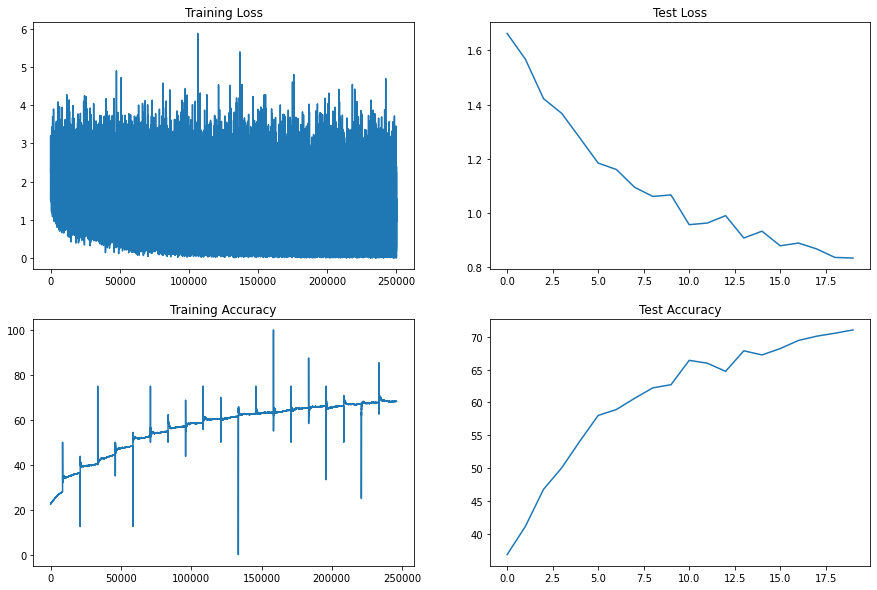

In [8]:
import matplotlib.pyplot as plt

# Convert lists to PyTorch tensors
train_losses = torch.tensor(train_losses)
train_acc = torch.tensor(train_acc)
test_losses = torch.tensor(test_losses)
test_acc = torch.tensor(test_acc)

# Move tensors to CPU memory
train_losses_cpu = train_losses.cpu()
train_acc_cpu = train_acc.cpu()
test_losses_cpu = test_losses.cpu()
test_acc_cpu = test_acc.cpu()

# Plot the figures
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses_cpu)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_cpu[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_cpu)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_cpu)
axs[1, 1].set_title("Test Accuracy")

# Display the plots
plt.show()
